# Problem 1 Logistic Regression

In [51]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
u1=[1,0]
u2=[0,1]
sigma1=[[1,0.75],[0.75,1]]
sigma2=[[1,0.5],[-0.5,1]]

#### Generating Gaussian Random Samples

In [53]:
np.random.seed(139)
data1=np.random.multivariate_normal(u1,sigma1,500)
data2=np.random.multivariate_normal(u2,sigma2,500)
label_0=np.zeros((500,1))
label_1=np.ones((500,1))
data_1=np.concatenate((data1,label_0),axis=1)
data_2=np.concatenate((data2,label_1),axis=1)
data=np.concatenate((data_1,data_2),axis=0)
np.random.shuffle(data)
df=pd.DataFrame(data,columns=['X_1','X_2','Class'])
x=df[['X_1','X_2']]
y=df[['Class']]

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_20633/3373767607.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  data2=np.random.multivariate_normal(u2,sigma2,500)


<AxesSubplot:xlabel='X_1', ylabel='X_2'>

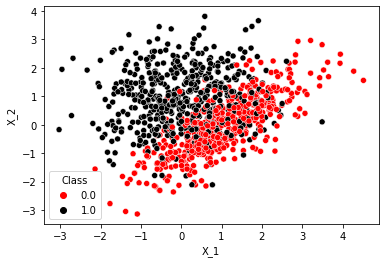

In [54]:
sns.scatterplot(x=df.X_1,y=df.X_2,hue=df.Class,palette=['red','black'])

# Logistic Regression 

In [55]:
class LogisticRegression():
    
    def __init__(self,learning_rate=0.01):
        self.learning_rate=learning_rate
    
    
    #Sigmoid function
    def sigmoid(self,z):
        return (1/(1+np.exp(-z)))
    
    
    def fit(self,x):
        n_samples,n_features=x.shape
        self.bias=0
        self.weights=np.zeros((n_features,1))
        
        for i in range(10000):
            self.model=self.bias+np.dot(x,self.weights)
            y_hat=self.sigmoid(self.model)
            #print(y_hat.shape)

            #gradient descent
            db=np.array((1/len(x))*np.sum(y_hat-y))
            dw=(1/len(x))*(np.dot(x.T,(y_hat-y)))
            
            #update weights
            self.weights-=self.learning_rate*dw
            self.bias-=self.learning_rate*db
            
            #stopping criteria
            if self.bias[0]<0.00001 and self.weights[0]< -0.00001 and self.weights[1]< 0.00001:
                print('Number of iternations required to converge: ',i)
                break
        print(self.bias[0],self.weights[0],self.weights[1])  
    
    def train(self,x):
        self.model=self.bias+np.dot(x,self.weights)
    
    
    def predict(self,x):
        self.y_probability=self.sigmoid(self.model)
        #list comprenhension
        y_predicted=[1 if y_probability>=0.5 else 0 for y_probability in self.y_probability]
        self.y_predicted=np.asarray(y_predicted)
         
    
    def accuracy(self,y):
        count=0
        for i in range(len(x)):
            if self.y_predicted[i]==y.Class[i]:
                count+=1
        return (count/len(x))*100
    
    
    def plot_scatter_plot(slef):
        sns.scatterplot(x=df.X_1,y=df.X_2,hue=df.Class,palette=['red','green'])
        xp=(-0.09904693622733687--0.96139242*df.X_1)/1.02065441
        plt.plot(df.X_1,xp,color='black')
    
    def roc_curve(self,y):
        tp=0
        tn=0
        fp=0
        fn=0
        for i in range(len(x)):
            if self.y_predicted[i]==1 and y.Class[i]==1:
                tp+=1
            else:
              if self.y_predicted[i]==0 and y.Class[i]==0:
                 tn+=1   
            if self.y_predicted[i]==1 and y.Class[i]==0:
                fp+=1
            else:
             if self.y_predicted[i]==0 and y.Class[i]==1:
                fn+=1
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        f1_score=(2*precision*recall)/(precision+recall)
        true_positive_rate=tp/(tp+fn)
        false_positive_rate=fp/(fp+tn)
        print('Precision: ',precision)
        print('Recall: ',recall)
        print('F1-Score: ',f1_score)
        print('True Positive Rate: ',true_positive_rate)
        print('False Positive Rate:',false_positive_rate)
    
    
    def loss(self,x,y):
        loss= -(1/len(x)*np.sum(y*np.log(self.y_probability)+(1-y)*np.log(1-self.y_probability)))
        print('Loss: ',loss)
    
    def probability(self):
        return self.y_probability
    
    
    def predict_class(self):
        return self.y_predicted
    
    

## Fitting model 

#### Learning Rate 0.0001

In [56]:
l=LogisticRegression(0.0001)
%time l.fit(x)
l.train(x)
l.predict(x)
l.loss(x,y)
l.accuracy(y)

0.002280155269549183 [-0.20573211] [0.20846845]
CPU times: user 35 s, sys: 9.18 s, total: 44.2 s
Wall time: 6.28 s
Loss:  Class    0.606854
dtype: float64


81.8

#### Learning Rate 0.001

In [57]:
l=LogisticRegression(0.001)
%time l.fit(x)
l.train(x)
l.predict(x)
l.loss(x,y)
l.accuracy(y)

0.0985072093180733 [-0.95804408] [1.01678516]
CPU times: user 35 s, sys: 11 s, total: 45.9 s
Wall time: 6.86 s
Loss:  Class    0.446027
dtype: float64


82.19999999999999

#### Learning Rate 0.01

In [58]:
l=LogisticRegression(0.01)
%time l.fit(x)
l.train(x)
l.predict(x)
l.loss(x,y)
l.accuracy(y)

0.4118201917210249 [-1.59586996] [1.64757225]
CPU times: user 34 s, sys: 11.5 s, total: 45.5 s
Wall time: 6.86 s
Loss:  Class    0.420172
dtype: float64


82.39999999999999

#### Learning Rate 0.1

In [59]:
l=LogisticRegression(0.1)
%time l.fit(x)
l.train(x)
l.predict(x)
l.loss(x,y)
l.accuracy(y)

0.4195045409467942 [-1.60769834] [1.65811035]
CPU times: user 34.5 s, sys: 10.1 s, total: 44.6 s
Wall time: 6.41 s
Loss:  Class    0.420166
dtype: float64


82.39999999999999

#### Learning Rate 1

In [60]:
l=LogisticRegression(1)
%time l.fit(x)
l.train(x)
l.predict(x)
l.loss(x,y)
l.accuracy(y)

0.41950454094680595 [-1.60769834] [1.65811035]
CPU times: user 34.7 s, sys: 9.65 s, total: 44.4 s
Wall time: 6.26 s
Loss:  Class    0.420166
dtype: float64


82.39999999999999

#### Decision Boundry

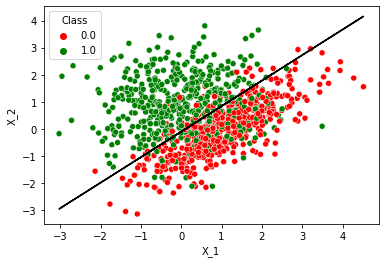

In [61]:
l.plot_scatter_plot()

## Prediction on Testing Data Set

In [62]:
np.random.seed(2386349)
data1=np.random.multivariate_normal(u1,sigma1,500)
data2=np.random.multivariate_normal(u2,sigma2,500)
label_0=np.zeros((500,1))
label_1=np.ones((500,1))
data_1=np.concatenate((data1,label_0),axis=1)
data_2=np.concatenate((data2,label_1),axis=1)
data=np.concatenate((data_1,data_2),axis=0)
np.random.shuffle(data)
df=pd.DataFrame(data,columns=['X_1','X_2','Class'])
x_test=df[['X_1','X_2']]
y_test=df[['Class']]

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_20633/2192515830.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  data2=np.random.multivariate_normal(u2,sigma2,500)


In [63]:
#Fitiing model for testing data
l.train(x_test)
l.predict(x_test)
l.loss(x_test,y_test)
l.accuracy(y_test)

Loss:  Class    0.377521
dtype: float64


83.89999999999999

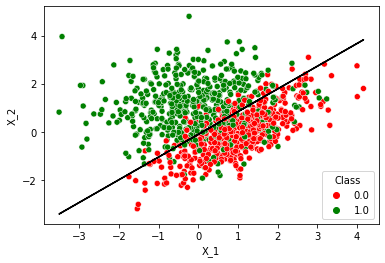

In [64]:
l.plot_scatter_plot()

### Learning Rate vs Accuarcy

Text(0.5, 1.0, 'Learning Rate vs Accuarcy')

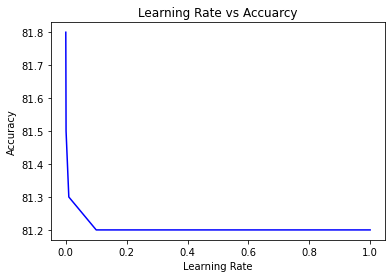

In [65]:
Learning_Rates = [ 0.0001, 0.001, 0.01, 0.1, 1] 
Accuracies = [ 81.8, 81.5, 81.3, 81.2, 81.2] 
plt.plot(Learning_Rates,Accuracies,color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuarcy')

### ROC Curve

In [66]:
p=pd.DataFrame(l.probability(),columns=['Prob'])
lab=pd.concat((y_test,p),axis=1)

In [67]:
lab=lab.sort_values(by='Prob',ascending=False)

In [68]:
tpp=lab[lab['Class']>=0.5].Prob

In [69]:
fpp=lab[lab['Class']<0.5].Prob

Text(0.5, 1.0, 'ROC Curve')

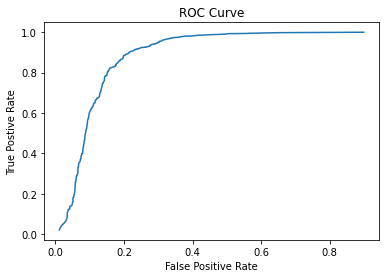

In [70]:
plt.plot(fpp,tpp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title("ROC Curve")

Text(0.5, 1.0, 'ROC Curve')

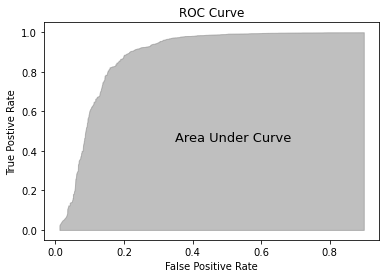

In [71]:
plt.fill_between(fpp,tpp,color='gray',alpha=0.5)
plt.text(0.35,0.45,'Area Under Curve',size=13)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title("ROC Curve")

### Precison, Recall, F1-Score 

In [72]:
#for traing dataset
l.roc_curve(y)

Precision:  0.51340206185567
Recall:  0.498
F1-Score:  0.5055837563451776
True Positive Rate:  0.498
False Positive Rate: 0.472


In [73]:
#for testing dataset
l.roc_curve(y_test)

Precision:  0.8494845360824742
Recall:  0.824
F1-Score:  0.8365482233502537
True Positive Rate:  0.824
False Positive Rate: 0.146


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,roc_curve

In [79]:
lr = LogisticRegression()

In [81]:
lr.fit(x_test,y_test)

/Users/abhijitdeshpande/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [83]:
a = lr.predict_proba(x_test)

In [89]:
fpr,tpr,_ = roc_curve(y_test,a[:,1])

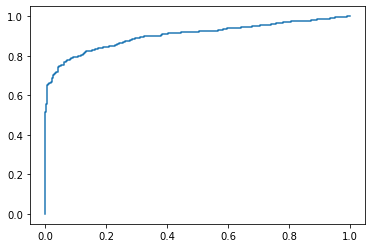

In [90]:
plt.plot(fpr,tpr)